<!DOCTYPE html>
<html>
<body >
<div style="background-color:powderblue;">
<h1 style ="color:#00008b">Whatsapp Chat Analyzer</h1>
</div>
</body>
</html>

# Things to be analyzed

<!DOCTYPE html>
<html>
<body>

<h2 style ="color:blue">Contact-wise statistics:</h2>

<ul>
  <li>Number of messages per contact</li>
  <li>Number of words per contact </li>
  <li>Number of average words per message per contact</li>
  <li>Number of emojis per contact</li>
  <li>Number of emojis per contact</li>
  <li>NUmber of media per contact</li>
  <li>NUmber of keywords per contact</li>
</ul>  

</body>
</html>


<!DOCTYPE html>
<html>
<body>

<h2 style ="color:blue">TIme-wise statistics:</h2>

<ul>
  <li>Number of messages per hour</li>
  <li>Number of messages per weekday</li>
  <li>Number of messages per month</li>
  <li>Number of messages per year</li>
</ul>  

</body>
</html>

<!DOCTYPE html>
<html>
    <body>
        <hr size="30" noshade>
    </body>
</html>

In [3]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%config IPCompleter.use_jedi = False


In [4]:
#Getting the dataset for processing it

df=pd.read_csv('Dataset/WhatsApp-Chat-with-परम्परा-प्रतिष्ठा-अनुशासन.csv')
df.columns = ["Column"]
# df


## Spliting the text in the csv file into  different columns

In [5]:

#1 Splitting Date and rest of the columns

split_col=df.iloc[:,0].str.split(', ',expand=True)
df["Date"]=split_col[0]
df["Temp_col"]= split_col[1]

#OR
#df.columns = ['Date','Temp_col']

df.drop(columns=['Column'],inplace = True)


#2 Splitting Time and the other column

split_col =df["Temp_col"].str.split(' - ',expand=True)
df["Time"]= split_col[0]
df["Temp_col"]=split_col[1]

#3 Splitting user and chats columns
split_col = df["Temp_col"].str.split(': ',expand =True)
df["Users"]= split_col[0]
df["Whatsapp Chats"]=split_col[1]


df.drop(columns=["Temp_col"],inplace=True)


# Function to plot bar graph

In [6]:
def plotGraph(x,y,title):
#     fig,ax = plt.subplots()


#     y_pos = np.arange(len(x))
   
#     ax.barh(y_pos,y,align = 'center')
#     ax.set_yticks(y_pos)
#     ax.set_yticklabels(x)
#     # ax.set_xticks(y)
#     ax.set_title(title)
#     ax.invert_yaxis()

    fig,ax = plt.subplots()
    y= np.array(y)
    chk_index= y[y.argsort()][::-1]


    pips=[0]*len(x)
    for i in range(len(x)):
        pips[i] = x[y.argsort()[::-1][i]] 

    y_pos = np.arange(len(x))

    ax.barh(y_pos,chk_index,align = 'center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(pips)
    # ax.set_xticks(y)
    ax.set_title(title)
    ax.invert_yaxis()


## Creating two DataFrames - with media and without media

In [7]:
df_wo_media = df[df["Whatsapp Chats"].str.contains(r'Image omitted')==False]
df_wo_media = df[df["Whatsapp Chats"].str.contains(r'video omitted')==False]
df_wo_media = df[df["Whatsapp Chats"].str.contains(r'GIF omitted')==False]
df_wo_media = df[df["Whatsapp Chats"].str.contains(r'<Media omitted>')==False]

# df_wo_media.reset_index(drop=True)

## Dropping Nan values from the dataframes

In [8]:
df=df.dropna()
df_wo_media=df_wo_media.dropna()

df = df.reset_index(drop=True)
df_wo_media=df_wo_media.reset_index(drop=True)

## Creating an User array

In [9]:
user_list = df["Users"].unique()


In [10]:

#Messages per user (including media)

chats_per_person=[]
most_msg_by_user = []
for i in range(len(user_list)):
    temp = df["Whatsapp Chats"][df["Users"]==user_list[i]]
    temp = temp.reset_index(drop =True)
    most_msg_by_user.append(temp.shape[0])
    for j in range(1,len(temp)):
        temp[0] += ' ' + temp[j]
    chats_per_person.append(temp[0])
    del temp
        
#Messages per user (excluding media)
chats_per_person_wo=[]
most_msg_by_user_wo = []
for i in range(len(user_list)):
    temp = df_wo_media["Whatsapp Chats"][df_wo_media["Users"]==user_list[i]]
    temp = temp.reset_index(drop =True)
    most_msg_by_user_wo.append(temp.shape[0])
    for j in range(1,len(temp)):
        temp[0] += ' ' + temp[j]
    chats_per_person_wo.append(temp[0])
    del temp

## Bar graph  to represent most messages per user

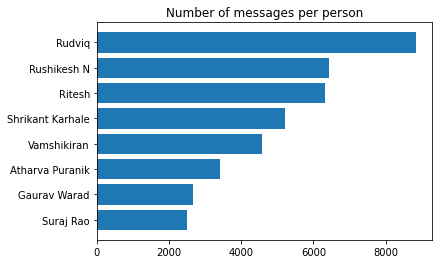

In [11]:
# fig,ax = plt.subplots()


# y_pos = np.arange(len(user_list))

# ax.barh(y_pos,most_msg_by_user,align = 'center')
# ax.set_yticks(y_pos)
# ax.set_yticklabels(user_list)
# # ax.set_xticks(y)
# ax.set_title("Number of messages per person")
# ax.invert_yaxis()
plotGraph(user_list,most_msg_by_user,'Number of messages per person')


In [12]:
# most_msg_by_user
# chats_per_person

##  Mostly used words by each user

In [13]:
from scipy.stats import itemfreq

In [14]:
#Message frequency without media files

for i in range(len(user_list)):
    fg = itemfreq(list(chats_per_person_wo)[i].split(' '))
    fg = fg[fg[:,1].astype(float).argsort()][::-1]
    print(user_list[i],fg[1:4])

/home/rudviq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  after removing the cwd from sys.path.


Vamshikiran [['I' '184']
 ['nhi' '176']
 ['toh' '175']]
Rushikesh N [['to' '344']
 ['😂😂' '289']
 ['me' '249']]
Ritesh [['to' '754']
 ['me' '465']
 ['I' '407']]
Rudviq [['nhi' '569']
 ['me' '565']
 ['toh' '477']]
Shrikant Karhale [['nh' '411']
 ['bhi' '371']
 ['ke' '345']]
Atharva Puranik [['😂😂' '135']
 ['h' '123']
 ['nhi' '122']]
Suraj Rao [['😂😂😂😂' '133']
 ['nahi' '119']
 ['me' '118']]
Gaurav Warad [['😂' '125']
 ['😂😂' '101']
 ['the' '70']]


## Number of letters per user

In [15]:
import regex as re

In [16]:

chats_person_only_text=[]
only_text = re.sub(r'[^a-zA-Z0-9]',r'',chats_per_person_wo[0])
# only_text
# chats_per_person_wo
tot_no_text =[]
for i in range(len(user_list)):
    only_text = re.sub(r'[^a-zA-Z0-9]',r'',chats_per_person_wo[i])
    only_words = re.sub(r'[^a-zA-Z0-9_ ]',r' ',chats_per_person_wo[i])
#     only_words=only_words.split(' ')
#     while("" in only_words):
#         only_words.remove("")
    chats_person_only_text.append(only_words)
    tot_no_text.append(len(only_text))

tot_no_text
only_text
chats_person_only_text[7]

'Athrya ko bhaga diya tum logon ne      Coronavirus death toll  2     Sarang  Lon   kon Guys    Contagion Yeh movie dekho Feels so real   Spread of a virus Online lecture karna hai kya  Aaj ka din karenge  Same    Kuch nahi Corona chal raha hai 0 Score kay ahe             Chalo kuch karte hai   Nahi re khana kha raha tha    1 lakh Mi nahi kela re  What swades  Movie  Wow Ritya ke pass backup hai Mazyakade plot ahe Ani business takel Kyu dara raha hai  Ha    Delhi bhi lockdown pe hai Kheti hai lekin paani nahi hai Karnataka Hai re Ek do din mein pata chalega Sabka Testing chalu kiya hai na abhi  Exactly    Question mark idhar hai Sanchar bandi mhanje kay  Mai abhi groceries lene gaya tha    Sab jagah police   Muze bhi roka He s weird   Ha Actually uske ghar ke bahar ka hi photo tha woh Mi pn tikdech rahto so mla mahitiye Yes   he should be at home    My cousin in US went for a long walk today Government cancelled all interstate travel in delhi So many UPians were stuck in Delhi  Yeh mai

## Most used words by user(excluding emojis)

In [17]:

for i in range(len(user_list)):
    fg = itemfreq(list(chats_person_only_text)[i].split(' '))
    fg = fg[fg[:,1].astype(float).argsort()][::-1]
    print(user_list[i],fg[1:4])

/home/rudviq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  


Vamshikiran [['hai' '567']
 ['I' '226']
 ['kya' '187']]
Rushikesh N [['hai' '961']
 ['to' '346']
 ['I' '288']]
Ritesh [['hai' '1256']
 ['to' '759']
 ['me' '471']]
Rudviq [['hai' '1842']
 ['me' '592']
 ['nhi' '587']]
Shrikant Karhale [['hai' '1407']
 ['nh' '422']
 ['kya' '391']]
Atharva Puranik [['hai' '283']
 ['h' '156']
 ['nhi' '146']]
Suraj Rao [['hai' '266']
 ['nahi' '119']
 ['me' '118']]
Gaurav Warad [['hai' '321']
 ['https' '78']
 ['kya' '74']]


## Bar graph to represent Number of texts by each user

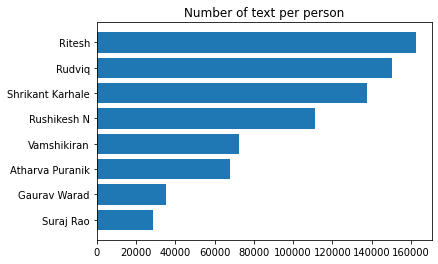

In [62]:
# fig,ax = plt.subplots()


# y_pos = np.arange(len(user_list))

# ax.barh(y_pos,tot_no_text,align = 'center')
# ax.set_yticks(y_pos)
# ax.set_yticklabels(user_list)
# # ax.set_xticks(y)
# ax.set_title("Number of texts per person")
# ax.invert_yaxis()
plotGraph(user_list,tot_no_text,'Number of text per person')

## Number of emojis used per person

In [19]:
import emoji

no_of_emoji=[]
emojis_iter = map(lambda y: y, emoji.UNICODE_EMOJI['en'].keys())
regex_set = re.compile('|'.join(re.escape(em) for em in emojis_iter))

for i in range(len(user_list)):
    new_list = regex_set.findall(chats_per_person_wo[i]) 
    no_of_emoji.append(len(new_list))

# no_of_emoji

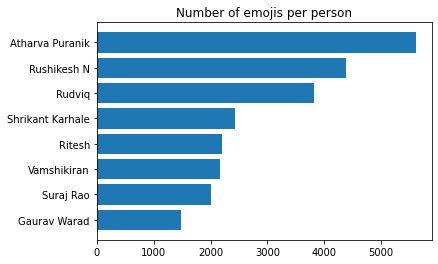

In [63]:
# fig,ax = plt.subplots()


# y_pos = np.arange(len(user_list))

# ax.barh(y_pos,no_of_emoji,align = 'center')
# ax.set_yticks(y_pos)
# ax.set_yticklabels(user_list)
# # ax.set_xticks(y)
# ax.set_title("Number of emojis per person")
# ax.invert_yaxis()

plotGraph(user_list,no_of_emoji,'Number of emojis per person')


## Number of words per user

In [21]:
no_of_words = []
for i in range(len(user_list)):
    N= chats_per_person_wo[i].split(' ')
    no_of_words.append(len(N))
    
# no_of_words    

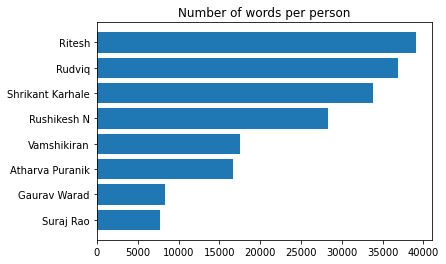

In [64]:
# fig,ax = plt.subplots()


# y_pos = np.arange(len(user_list))

# ax.barh(y_pos,no_of_words,align = 'center')
# ax.set_yticks(y_pos)
# ax.set_yticklabels(user_list)
# # ax.set_xticks(y)
# ax.set_title("Number of words per person")
# ax.invert_yaxis()

plotGraph(user_list,no_of_words,'Number of words per person')

In [23]:
len(df[df["Whatsapp Chats"].str.contains(r'<Media omitted>')==True][df["Users"]==user_list[2]])

/home/rudviq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


455

## Number of media files sent per user

In [24]:
no_of_media = []

for i in range(len(user_list)):
    l=len(df[df["Whatsapp Chats"].str.contains(r'<Media omitted>')==True][df["Users"]==user_list[i]])
    no_of_media.append(l)
    
no_of_media

/home/rudviq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/rudviq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/rudviq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/rudviq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/rudviq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/rudviq/.local/lib/python3.6/site-packages/ipykern

[166, 512, 455, 443, 1300, 286, 143, 198]

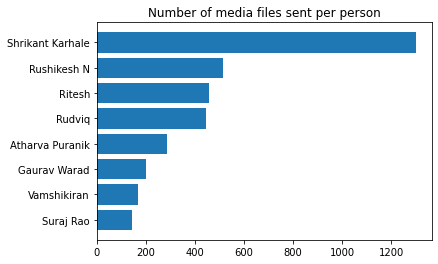

In [65]:
# fig,ax = plt.subplots()


# y_pos = np.arange(len(user_list))

# ax.barh(y_pos,no_of_media,align = 'center')
# ax.set_yticks(y_pos)
# ax.set_yticklabels(user_list)
# # ax.set_xticks(y)
# ax.set_title("Number of media files sent per person")
# ax.invert_yaxis()

plotGraph(user_list,no_of_media,'Number of media files sent per person')

## Average number of words per message per contact

In [26]:
#Avg no of words per message per contact including media

avg_words = []
for i in range(len(user_list)):
    avg_words.append(no_of_words[i]/most_msg_by_user_wo[i])
    

avg_words

[3.959954751131222,
 4.790870667793745,
 6.653610354223433,
 4.400929345883474,
 8.613363937770977,
 5.350899742930591,
 3.3273504273504275,
 3.373729158194388]

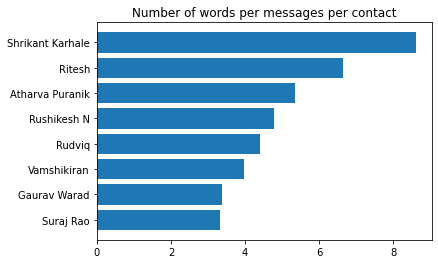

In [66]:
# fig,ax = plt.subplots()


# y_pos = np.arange(len(user_list))

# ax.barh(y_pos,avg_words,align = 'center')
# ax.set_yticks(y_pos)
# ax.set_yticklabels(user_list)
# # ax.set_xticks(y)
# ax.set_title("Number of words per messages per contact")
# ax.invert_yaxis()

plotGraph(user_list,avg_words,'Number of words per messages per contact')

## Summary

In [28]:
import datetime
import time

date_list =[]
for i in range(len(df["Date"])):
    date_list.append(datetime.datetime.strptime(df["Date"][i],"%d/%m/%Y").strftime("%d/%m/%Y"))
    
    

In [29]:
Start_date = date_list[0]
End_date=date_list[-1]

print(Start_date,"  ",End_date)

21/03/2020    11/06/2021


In [30]:
Start_time = df["Time"][0]
End_time = df["Time"][len(df["Time"])-1]

print(Start_time,"  ",End_time)

18:54    12:54


In [31]:
Total_msg=0
Total_text=0
Total_media=0
Total_words = 0
Total_emoji=0
for i in range(8):
    Total_msg += most_msg_by_user[i]
    Total_text += tot_no_text[i]
    Total_media += no_of_media[i]
    Total_words += no_of_words[i]
    Total_emoji += no_of_emoji[i]
    
    
# sum
# sum1
# # sum2
# sum3
# sum4
print('Total messages: ',Total_msg)
print('Total no of letters: ',Total_text)
print('Total files(media): ',Total_media)
print('Total words: ',Total_words)
print('Total emojis: ',Total_emoji)

Total messages:  39935
Total no of letters:  766035
Total files(media):  3503
Total words:  188355
Total emojis:  24096


## Time wise Statistical data

### Date on which most chatting was done

In [32]:
most_msg_date = itemfreq(df['Date'])
most_msg_date = most_msg_date[most_msg_date[:,-1].argsort()][::-1]
most_msg_date

/home/rudviq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  """Entry point for launching an IPython kernel.


array([['28/03/2020', 808],
       ['20/10/2020', 684],
       ['01/04/2020', 577],
       ['24/03/2020', 572],
       ['29/03/2020', 526],
       ['10/11/2020', 524],
       ['23/03/2020', 493],
       ['09/10/2020', 491],
       ['28/04/2020', 459],
       ['31/05/2020', 458],
       ['02/04/2020', 458],
       ['21/04/2020', 457],
       ['27/03/2020', 456],
       ['01/06/2020', 449],
       ['01/11/2020', 446],
       ['30/05/2020', 441],
       ['12/11/2020', 437],
       ['15/10/2020', 429],
       ['22/03/2020', 429],
       ['19/05/2020', 424],
       ['25/03/2020', 414],
       ['29/06/2020', 374],
       ['03/12/2020', 362],
       ['17/06/2020', 348],
       ['08/10/2020', 343],
       ['12/10/2020', 334],
       ['26/10/2020', 332],
       ['26/03/2021', 323],
       ['16/04/2020', 319],
       ['30/10/2020', 316],
       ['05/05/2020', 312],
       ['12/09/2020', 307],
       ['30/03/2020', 301],
       ['12/07/2020', 273],
       ['16/10/2020', 263],
       ['01/05/2020'

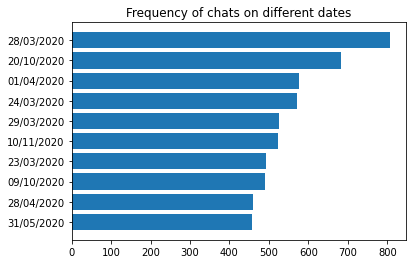

In [68]:
fig,ax = plt.subplots()


y_pos = np.arange(10)

ax.barh(y_pos,most_msg_date[:10,1],align = 'center')
ax.set_yticks(y_pos)
ax.set_yticklabels(most_msg_date[:10,0])
# ax.set_xticks(y)
ax.set_title("Frequency of chats on different dates")
ax.invert_yaxis()

# plotGraph(10,most_msg_date[:10,1],'Fre')

### Time when mostly chatting is done

In [34]:
most_msg_time = itemfreq(df['Time'])
# df['Time']= df['Time'][df['Time'][:,1].argsort()][::-1]
most_msg_time = most_msg_time[most_msg_time[:,1].argsort()][::-1]
most_msg_time

/home/rudviq/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  """Entry point for launching an IPython kernel.


array([['22:26', 96],
       ['22:25', 95],
       ['22:14', 92],
       ...,
       ['05:09', 1],
       ['05:02', 1],
       ['02:45', 1]], dtype=object)

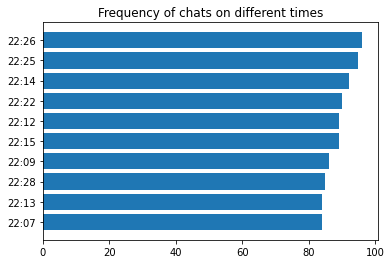

In [35]:
fig,ax = plt.subplots()


y_pos = np.arange(10)

ax.barh(y_pos,most_msg_time[:10,1],align = 'center')
ax.set_yticks(y_pos)
ax.set_yticklabels(most_msg_time[:10,0])
# ax.set_xticks(y)
ax.set_title("Frequency of chats on different times")
ax.invert_yaxis()


## Calculating number of messages per hour

In [36]:
import math

a = Start_date + ' '+Start_time
b = End_date + ' '+ End_time

start_hour = datetime.datetime.strptime(a,'%d/%m/%Y %H:%M')
end_hour = datetime.datetime.strptime(b,'%d/%m/%Y %H:%M')

Diff = end_hour-start_hour
no_of_hours = Diff.seconds/3600 + Diff.days *24

no_of_days = math.ceil(no_of_hours/24)
no_of_days

no_of_week =math.ceil(no_of_days/7)
no_of_week

no_of_month = (end_hour.year - start_hour.year)*12 + (end_hour.month - start_hour.month)
no_of_month

no_of_year = (end_hour.year - start_hour.year)


In [37]:
msg_per_year = Total_msg / no_of_year
msg_per_year

msg_per_week = Total_msg/ no_of_week
msg_per_week

msg_per_month = Total_msg/no_of_month
msg_per_month

msg_per_day = Total_msg / no_of_days
msg_per_day

msg_per_hour = Total_msg/no_of_hours
msg_per_hour

3.7245849654915126

In [38]:
print(most_msg_by_user)

[4586, 6427, 6327, 8836, 5221, 3398, 2483, 2657]


In [39]:
print(no_of_words)

[17503, 28338, 39070, 36937, 33773, 16652, 7786, 8296]


In [40]:
print(tot_no_text)

[72396, 111142, 162532, 150429, 137660, 67933, 28819, 35124]


In [41]:
print(avg_words)

[3.959954751131222, 4.790870667793745, 6.653610354223433, 4.400929345883474, 8.613363937770977, 5.350899742930591, 3.3273504273504275, 3.373729158194388]


In [42]:
print(no_of_media)

[166, 512, 455, 443, 1300, 286, 143, 198]


In [43]:
print(no_of_emoji)

[2157, 4377, 2206, 3818, 2437, 5611, 2003, 1487]


## Testing 


In [44]:
# test_emoji = re.findall(r'[^\w\s,.]',chats_per_person_wo[0])
# len(test_emoji)
sum_test_emoji=0
for i in range(8):
    test_emoji = re.findall(r'[^\w\s,.]',chats_per_person_wo[i])
    sum_test_emoji += len(test_emoji)
    
sum_test_emoji

35382

In [45]:
sum=0
sum1=0
sum2=0
sum3 = 0
sum4=0
for i in range(8):
    sum += most_msg_by_user[i]
    sum1 += tot_no_text[i]
    sum2 += no_of_media[i]
    sum3 += no_of_words[i]
    sum4 += no_of_emoji[i]
    
    
# sum
# sum1
# # sum2
# sum3
# sum4
print('Total messages: ',sum)
print('Total no of letters: ',sum1)
print('Total files(media): ',sum2)
print('Total words: ',sum3)
print('Total emojis: ',sum4)

Total messages:  39935
Total no of letters:  766035
Total files(media):  3503
Total words:  188355
Total emojis:  24096


In [46]:
print(no_of_emoji)

[2157, 4377, 2206, 3818, 2437, 5611, 2003, 1487]


In [47]:
sum1+ sum_test_emoji

801417

In [48]:
import emoji

no_of_emoji_w=[]
emojis_iter_w = map(lambda y: y, emoji.UNICODE_EMOJI['en'].keys())
regex_set = re.compile('|'.join(re.escape(em) for em in emojis_iter_w))

for i in range(len(user_list)):
    new_list = regex_set.findall(chats_per_person[i]) 
    new_list1 = regex_set.findall(chats_per_person[2]) 
    no_of_emoji_w.append(len(new_list))
    
no_of_emoji_w

[2157, 4377, 2206, 3818, 2437, 5611, 2003, 1487]

In [49]:
s=0
for i in range(8):
    s+=no_of_emoji_w[i]
s

24096

In [50]:
df_wo_media["Whatsapp Chats"][df["Users"]==user_list[2]]

8        Iss mehangayi ke daur me ek unit se 20 obj vo ...
15                                     Me bhi vahi bol rha
21                        Chill janata curfew hai jao Todo
25                              Chalo dosto apna to hogaya
26                          Leaving through emergency exit
                               ...                        
36410                                                 nahi
36411                                                   🤣🤣
36413    nahi me kal register kela n ajj chi appointmen...
36423                                                    😂
36428                                                  🤣🤣🤣
Name: Whatsapp Chats, Length: 6111, dtype: object

In [51]:
new_list1[2100:]

['😂',
 '👍',
 '🏻',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '🙏',
 '🏻',
 '🙏',
 '🏻',
 '🙏',
 '🏻',
 '🙏',
 '🏻',
 '🙏',
 '🏻',
 '😍',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😆',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '🎵',
 '🎶',
 '🎶',
 '🎶',
 '🤔',
 '😂',
 '😂',
 '😂',
 '🤔',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '🔥',
 '🔥',
 '🔥',
 '😂',
 '🤔',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '🔥',
 '🔥',
 '🔥',
 '🔥',
 '🔥',
 '🔥',
 '🙈',
 '🙈',
 '🙈',
 '🙈',
 '🙈',
 '🙈',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😼',
 '😂',
 '😂']

In [52]:
no_of_words_w =[]
for i in range(len(user_list)):
    N_= chats_per_person[i].split(' ')
    no_of_words_w.append(len(N_))
    
no_of_words_w

avg_ = no_of_words_w[0]/most_msg_by_user[0]
avg_
N_

['Athrya',
 'ko',
 'bhaga',
 'diya',
 'tum',
 'logon',
 'ne',
 '😂😂😂😂',
 'Coronavirus',
 'death',
 'toll',
 '+2',
 '😂😂😂',
 'Sarang?',
 'Lon?',
 '*kon',
 'Guys...',
 'Contagion',
 'Yeh',
 'movie',
 'dekho',
 'Feels',
 'so',
 'real..',
 'Spread',
 'of',
 'a',
 'virus',
 'Online',
 'lecture',
 'karna',
 'hai',
 'kya?',
 'Aaj',
 'ka',
 'din',
 'karenge?',
 'Same...',
 'Kuch',
 'nahi',
 'Corona',
 'chal',
 'raha',
 'hai',
 '0',
 'Score',
 'kay',
 'ahe??',
 '🤣🤣🤣🤣',
 '😰',
 '😂😂',
 'Chalo',
 'kuch',
 'karte',
 'hai..',
 'Nahi',
 're',
 'khana',
 'kha',
 'raha',
 'tha',
 '😂😂',
 '1',
 'lakh',
 'Mi',
 'nahi',
 'kela',
 're🙄',
 'What',
 'swades?',
 'Movie?',
 'Wow',
 '<Media',
 'omitted>',
 'Ritya',
 'ke',
 'pass',
 'backup',
 'hai',
 'Mazyakade',
 'plot',
 'ahe',
 'Ani',
 'business',
 'takel',
 'Kyu',
 'dara',
 'raha',
 'hai?',
 'Ha...',
 'Delhi',
 'bhi',
 'lockdown',
 'pe',
 'hai',
 'Kheti',
 'hai',
 'lekin',
 'paani',
 'nahi',
 'hai',
 'Karnataka',
 'Hai',
 're',
 'Ek',
 'do',
 'din',
 'mein',
 '

In [53]:
tot_no_text_final =[]
for i in range(len(user_list)):
    only_text = re.sub(r'[^a-zA-Z0-9]',r'',chats_per_person[i])
#     l=only_text.split(' ')
#     while("" in only_text):
#         only_text.remove("")
    tot_no_text_final.append(len(only_text))
    
tot_no_text_final

[74388, 117286, 167992, 155745, 153260, 71365, 30535, 37500]

In [54]:
q=0
for i in range(8):
    q+=tot_no_text_final[i]
    
q

808071

In [55]:
df

,Date,Time,Users,Whatsapp Chats
0,21/03/2020,18:54,Vamshikiran,?
1,21/03/2020,18:54,Rushikesh N,Kiran bhai boleeyyy
2,21/03/2020,18:54,Vamshikiran,Kya kuch samajh nhi aaya
3,21/03/2020,18:54,Vamshikiran,context hi clear nhi hai
4,21/03/2020,18:54,Rushikesh N,Sarang ko bole kya ki write up ki jagah mcqs s...
...,...,...,...,...
39930,10/06/2021,16:28,Atharva Puranik,<Media omitted>
39931,11/06/2021,11:12,Rudviq,<Media omitted>
39932,11/06/2021,11:24,Atharva Puranik,🥳
39933,11/06/2021,12:44,Vamshikiran,Noice



# Graph testing

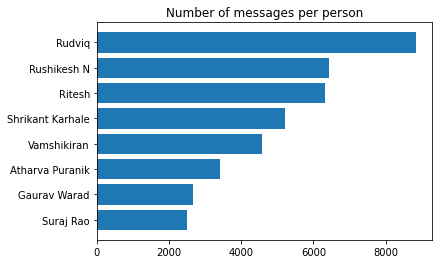

In [56]:
fig,ax = plt.subplots()
y= np.array(most_msg_by_user)
chk_index= y[y.argsort()][::-1]


pips=[0]*len(user_list)
for i in range(len(user_list)):
    pips[i] = user_list[y.argsort()[::-1][i]] 

y_pos = np.arange(len(user_list))

ax.barh(y_pos,chk_index,align = 'center')
ax.set_yticks(y_pos)
ax.set_yticklabels(pips)
# ax.set_xticks(y)
ax.set_title("Number of messages per person")
ax.invert_yaxis()




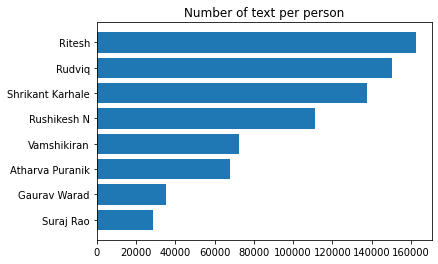

In [57]:
fig,ax = plt.subplots()
y= np.array(tot_no_text)
chk_index= y[y.argsort()][::-1]


pips=[0]*len(user_list)
for i in range(len(user_list)):
    pips[i] = user_list[y.argsort()[::-1][i]] 

y_pos = np.arange(len(user_list))

ax.barh(y_pos,chk_index,align = 'center')
ax.set_yticks(y_pos)
ax.set_yticklabels(pips)
# ax.set_xticks(y)
ax.set_title("Number of text per person")
ax.invert_yaxis()



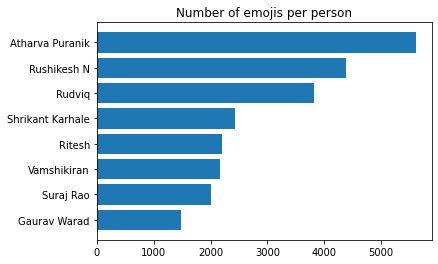

In [58]:
fig,ax = plt.subplots()
y= np.array(no_of_emoji)
chk_index= y[y.argsort()][::-1]


pips=[0]*len(user_list)
for i in range(len(user_list)):
    pips[i] = user_list[y.argsort()[::-1][i]] 

y_pos = np.arange(len(user_list))

ax.barh(y_pos,chk_index,align = 'center')
ax.set_yticks(y_pos)
ax.set_yticklabels(pips)
# ax.set_xticks(y)
ax.set_title("Number of emojis per person")
ax.invert_yaxis()



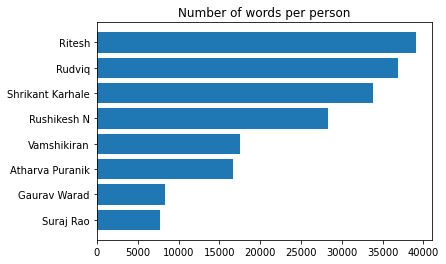

In [59]:
fig,ax = plt.subplots()
y= np.array(no_of_words)
chk_index= y[y.argsort()][::-1]


pips=[0]*len(user_list)
for i in range(len(user_list)):
    pips[i] = user_list[y.argsort()[::-1][i]] 

y_pos = np.arange(len(user_list))

ax.barh(y_pos,chk_index,align = 'center')
ax.set_yticks(y_pos)
ax.set_yticklabels(pips)
# ax.set_xticks(y)
ax.set_title("Number of words per person")
ax.invert_yaxis()


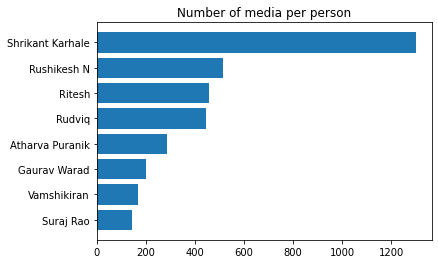

In [60]:
fig,ax = plt.subplots()
y= np.array(no_of_media)
chk_index= y[y.argsort()][::-1]


pips=[0]*len(user_list)
for i in range(len(user_list)):
    pips[i] = user_list[y.argsort()[::-1][i]] 

y_pos = np.arange(len(user_list))

ax.barh(y_pos,chk_index,align = 'center')
ax.set_yticks(y_pos)
ax.set_yticklabels(pips)
# ax.set_xticks(y)
ax.set_title("Number of media per person")
ax.invert_yaxis()


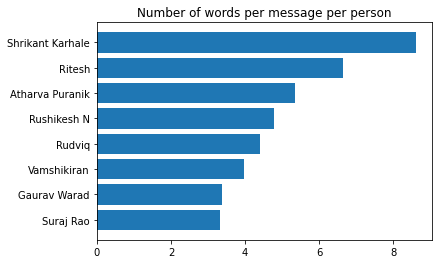

In [61]:
fig,ax = plt.subplots()
y= np.array(avg_words)
chk_index= y[y.argsort()][::-1]


pips=[0]*len(user_list)
for i in range(len(user_list)):
    pips[i] = user_list[y.argsort()[::-1][i]] 

y_pos = np.arange(len(user_list))

ax.barh(y_pos,chk_index,align = 'center')
ax.set_yticks(y_pos)
ax.set_yticklabels(pips)
# ax.set_xticks(y)
ax.set_title("Number of words per message per person")
ax.invert_yaxis()
